# Texto Bruto (Com Header e Com Entrevistador)

In [44]:
# Carregar X_train e y_train
import os
import chardet

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

@UTF8
@PID:	11312/t-00002184-1
@Begin
@Languages:	eng
@Participants:	PAR Participant, INV Investigator
@ID:	eng|Pitt|PAR|74;|male|Control||Participant|||
@ID:	eng|Pitt|INV|||||Investigator|||
@Media:	S001, audio
*INV:	tell me everything that you see going on in that picture . 0_2360
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
*INV:	everything that you see happening . 2360_4266
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-P

In [4]:
# Carregar X_test
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)
print(x_test)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

["@UTF8\n@PID:\t11312/t-00002388-1\n@Begin\n@Languages:\teng\n@Participants:\tPAR Participant, INV Investigator\n@ID:\teng|Pitt|PAR|63;|female|_X_||Participant|_Y_||\n@ID:\teng|Pitt|INV|||||Investigator|||\n@Media:\tS160, audio\n*PAR:\t&uh this boy is about to fall off o(f) the stool . \x150_3957\x15\n%mor:\tdet:dem|this n|boy cop|be&3S adv|about inf|to v|fall adv|off\n\tprep|of det:art|the n|stool .\n%gra:\t1|2|DET 2|3|SUBJ 3|0|ROOT 4|6|JCT 5|6|INF 6|3|CPRED 7|6|JCT 8|6|JCT\n\t9|10|DET 10|8|POBJ 11|3|PUNCT\n*PAR:\tthe mother is &uh washing dishes and the water's spilling over on\n\tthe &uh (.) kitchen floor . \x153957_12857\x15\n%mor:\tdet:art|the n|mother aux|be&3S part|wash-PRESP n|dish-PL coord|and\n\tdet:art|the n|water~aux|be&3S part|spill-PRESP adv|over prep|on\n\tdet:art|the n|kitchen n|floor .\n%gra:\t1|2|DET 2|4|SUBJ 3|4|AUX 4|0|ROOT 5|4|OBJ 6|10|LINK 7|8|DET 8|10|SUBJ\n\t9|10|AUX 10|4|CJCT 11|10|JCT 12|10|JCT 13|15|DET 14|15|MOD 15|12|POBJ\n\t16|4|PUNCT\n*PAR:\tthe wind is b

In [28]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7708333333333334


    k  Test Set Accuracy
0   1           0.687500
1   3           0.750000
2   5           0.791667
3   7           0.770833
4   9           0.770833
5  11           0.770833
6  13           0.770833
7  15           0.770833
8  17           0.750000
9  19           0.687500
Best k value: 5
Accuracy on test set with best k: 0.7916666666666666


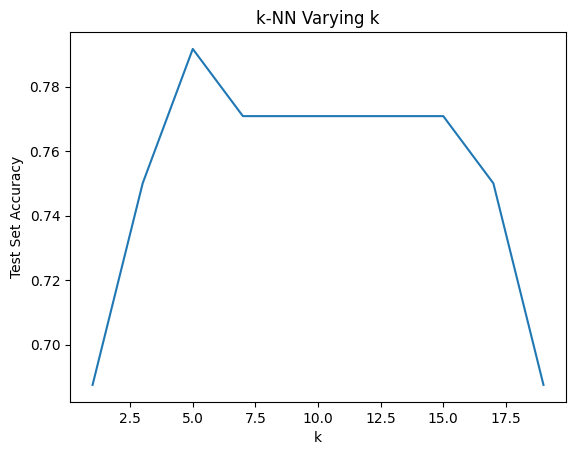

In [29]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Com Header e Sem Entrevistador

In [30]:
# Carregar X_train e y_train
import os
import chardet
import re

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

@UTF8
@PID:	11312/t-00002184-1
@Begin
@Languages:	eng
@Participants:	PAR Participant, INV Investigator
@ID:	eng|Pitt|PAR|74;|male|Control||Participant|||
@ID:	eng|Pitt|INV|||||Investigator|||
@Media:	S001, audio
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|J

In [31]:
# Carregar X_test
import os
import chardet
import re

# Função para carregar textos e remover texto entre *INV: e %
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [32]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.75


    k  Test Set Accuracy
0   1           0.625000
1   3           0.750000
2   5           0.791667
3   7           0.750000
4   9           0.729167
5  11           0.750000
6  13           0.750000
7  15           0.770833
8  17           0.708333
9  19           0.770833
Best k value: 5
Accuracy on test set with best k: 0.7916666666666666


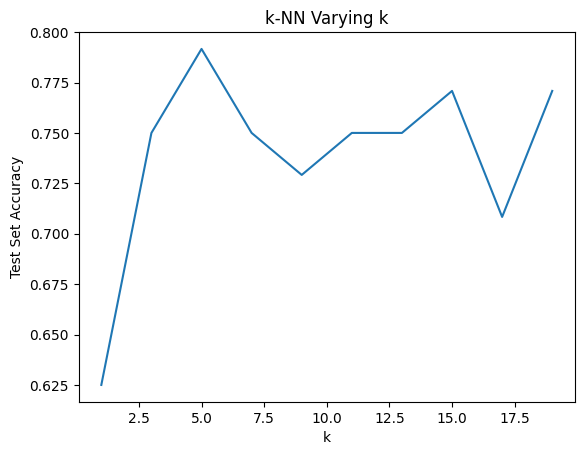

In [33]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Sem Header e Com Entrevistador

In [34]:
import os
import chardet

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                
                # Eliminar as primeiras 8 linhas
                lines = text.split('\n')
                text = '\n'.join(lines[8:])
                
                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

*INV:	tell me everything that you see going on in that picture . 0_2360
%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
*INV:	everything that you see happening . 2360_4266
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|JCT 8|6|XJCT
	9|10|DET 10|8|OBJ 11|10|CONJ 12|13|DET 13|15|SUBJ 14|15|AUX 15|11|COORD

In [35]:
# Carregar X_test
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [36]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7291666666666666


    k  Test Set Accuracy
0   1           0.708333
1   3           0.687500
2   5           0.687500
3   7           0.729167
4   9           0.708333
5  11           0.708333
6  13           0.687500
7  15           0.666667
8  17           0.687500
9  19           0.666667
Best k value: 7
Accuracy on test set with best k: 0.7291666666666666


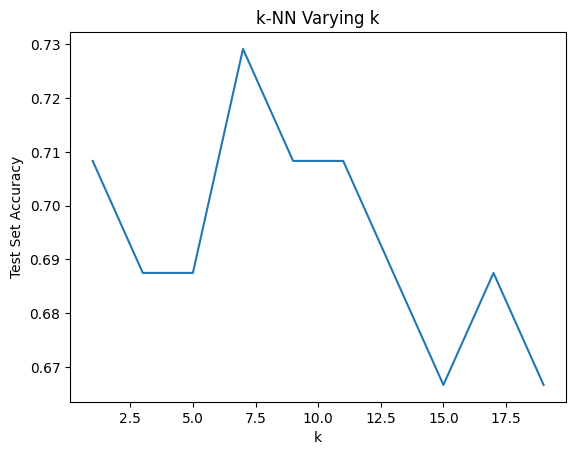

In [37]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Texto Sem Header e Sem Entrevistador

In [38]:
# Carregar X_train e y_train
import os
import chardet
import re

def load_texts_from_directory(directory, label):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                # Eliminar as primeiras 8 linhas
                lines = text.split('\n')
                text = '\n'.join(lines[8:])

                texts.append(text)
                labels.append(label)
    return texts, labels

# Diretórios das pastas
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos
x_train = x_neg + x_pos
y_train = y_neg + y_pos

print(x_train[0])

%mor:	v|tell pro:obj|me pro:indef|everything pro:rel|that pro:per|you
	v|see n:gerund|go-PRESP adv|on prep|in det:dem|that n|picture .
%gra:	1|0|ROOT 2|1|OBJ2 3|1|OBJ 4|6|LINK 5|6|SUBJ 6|3|CMOD 7|6|OBJ 8|6|JCT
	9|6|JCT 10|11|DET 11|9|POBJ 12|1|PUNCT
%mor:	pro:indef|everything pro:rel|that pro:per|you v|see
	n:gerund|happen-PRESP .
%gra:	1|0|INCROOT 2|4|LINK 3|4|SUBJ 4|1|CMOD 5|4|OBJ 6|1|PUNCT
*PAR:	well there's a mother standing there &uh &uh washing the dishes
	an(d) the sink is overspilling [: overflowing] [* s:r] . 4266_13310
%mor:	co|well pro:exist|there~cop|be&3S det:art|a n|mother
	part|stand-PRESP adv|there part|wash-PRESP det:art|the n|dish-PL
	coord|and det:art|the n|sink aux|be&3S over#part|flow-PRESP .
%gra:	1|3|COM 2|3|SUBJ 3|0|ROOT 4|5|DET 5|3|PRED 6|5|XMOD 7|6|JCT 8|6|XJCT
	9|10|DET 10|8|OBJ 11|10|CONJ 12|13|DET 13|15|SUBJ 14|15|AUX 15|11|COORD
	16|3|PUNCT
*PAR:	an(d) &uh the window's open . 13310_20608
%mor:	coord|and det:art|the adj|window&dn-POSS adj|open .
%gra:	1

In [39]:
# Carregar X_test
import os
import chardet
import re

# Função para carregar textos e remover texto entre *INV: e %
def load_texts_from_directory(directory):
    texts = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])

                # Remover texto entre *INV: e %
                text = re.sub(r'\*INV:.*?%', '%', text, flags=re.DOTALL)

                texts.append(text)
    return texts

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test = load_texts_from_directory(test_dir)

y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

In [40]:
# Implementar modelo de compressão
import gzip
from sklearn.neighbors import KNeighborsClassifier

def ncd(x, x2): # NCD with compressed lengths
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))  
    xx2 = len(gzip.compress((" ".join([x,x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# KNN classification
neigh = KNeighborsClassifier(n_neighbors=7) 
neigh.fit(train_ncd, y_train)

print("Accuracy:", neigh.score(test_ncd, y_test))

Accuracy: 0.7083333333333334


    k  Test Set Accuracy
0   1           0.708333
1   3           0.708333
2   5           0.687500
3   7           0.708333
4   9           0.750000
5  11           0.708333
6  13           0.666667
7  15           0.687500
8  17           0.666667
9  19           0.687500
Best k value: 9
Accuracy on test set with best k: 0.75


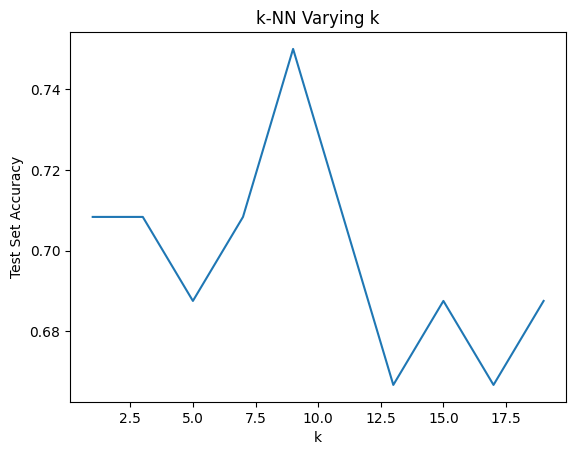

In [41]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Apenas Sequências Textuais do Paciente

### Concatenado

In [4]:
import os
import chardet
import re

def load_texts_from_directory(directory, label=None):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                # Process the text to extract *PAR lines
                par_text = extract_par_text(text)
                texts.append(par_text)
                if label is not None:
                    labels.append(label)
    return texts, labels

def extract_par_text(text):
    # Use regex to find lines that start with *PAR and capture the spoken part
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    # Concatenate the lines into a single string
    concatenated_text = " ".join(par_lines)
    # Remove any extra newline characters
    concatenated_text = concatenated_text.replace('\n', ' ')
    # Remove the series numbers enclosed in special characters
    cleaned_text = re.sub(r'\\d+_\d+\', '', concatenated_text)
    return cleaned_text.strip()

# Diretórios das pastas de treino
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos de treino
x_train = x_neg + x_pos
y_train = y_neg + y_pos

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Carregar textos de teste
x_test, _ = load_texts_from_directory(test_dir)

# Definir rótulos de teste
y_test = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

print(x_train[0])
print(x_test[0])

well there's a mother standing there &uh &uh washing the dishes 	an(d) the sink is overspilling [: overflowing] [* s:r] .  an(d) &uh the window's open .  and outside the window there's a <walk with a> [//] &c curved walk 	with a garden .  and you can see another &uh &uh building there .  looks like a garage or something with curtains and the grass in the 	garden .  and there are dishes [//] &uh &uh two cups and a saucer on the sink 	.  and &uh she's getting her feet wet from the overflow of the water 	from the sink .  she seems to be oblivious to the fact that the &s sink is 	overflowing .  she's also oblivious to the fact that her kids are stealin(g) 	cookies out o(f) the cookie jar .  and the kid on the stool is gonna fall off the stool .  he's standing up there in the cupboard takin(g) cookies out o(f) 	the jar, handin(g) them to his [//] &uh a girl about the same age . 	 the kids are somewhere around seven or eight years old or nine .  an(d) the mother is gonna get shocked <when th

    k  Test Set Accuracy
0   1           0.750000
1   3           0.833333
2   5           0.833333
3   7           0.791667
4   9           0.729167
5  11           0.770833
6  13           0.770833
7  15           0.750000
8  17           0.770833
9  19           0.770833
Best k value: 3
Accuracy on test set with best k: 0.8333333333333334


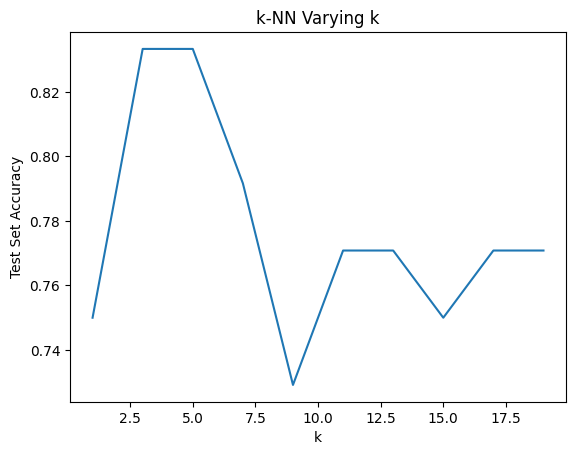

In [7]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### Não concatenado

In [20]:
import os
import chardet
import re
import numpy as np

def load_texts_from_directory(directory, label=None):
    texts = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".cha"):
            file_path = os.path.join(directory, filename)
            with open(file_path, 'rb') as file:
                raw_data = file.read()
                result = chardet.detect(raw_data)
                text = raw_data.decode(result['encoding'])
                # Process the text to extract *PAR lines
                par_texts = extract_par_texts(text)
                texts.extend(par_texts)  # Add all utterances to texts
                if label is not None:
                    labels.extend([label] * len(par_texts))  # Add label for each utterance
    return texts, labels

def extract_par_texts(text):
    # Use regex to find lines that start with *PAR and capture the spoken part
    par_lines = re.findall(r'\*PAR:\t(.*?)(?=\n\S)', text, re.DOTALL)
    par_texts = []
    for line in par_lines:
        # Remove any extra newline characters
        line = line.replace('\n', ' ')
        # Remove the series numbers enclosed in special characters
        cleaned_line = re.sub(r'\\d+_\d+\', '', line)
        par_texts.append(cleaned_line.strip())
    return par_texts

# Diretórios das pastas de treino
negative_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cc'
positive_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\train\transcription\cd'

# Carregar textos negativos (rótulo 0)
x_neg, y_neg = load_texts_from_directory(negative_dir, 0)

# Carregar textos positivos (rótulo 1)
x_pos, y_pos = load_texts_from_directory(positive_dir, 1)

# Combinar textos e rótulos de treino
x_train = x_neg + x_pos
y_train = y_neg + y_pos

# Diretório da pasta de teste
test_dir = r'C:\Users\Lenovo\Desktop\IC\[98] ADRESS-20 Database\ADReSS-IS2020-data\test\transcription'

# Rótulos de teste manualmente atribuídos
y_test_manual = [0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0]

# Carregar textos de teste e ajustar rótulos
x_test = []
y_test = []
label_index = 0

for filename in os.listdir(test_dir):
    if filename.endswith(".cha"):
        file_path = os.path.join(test_dir, filename)
        with open(file_path, 'rb') as file:
            raw_data = file.read()
            result = chardet.detect(raw_data)
            text = raw_data.decode(result['encoding'])
            # Process the text to extract *PAR lines
            par_texts = extract_par_texts(text)
            x_test.extend(par_texts)  # Add all utterances to texts
            if label_index < len(y_test_manual):
                y_test.extend([y_test_manual[label_index]] * len(par_texts))  # Add label for each utterance
                label_index += 1

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(1492,)
(1492,)
(590,)
(590,)


    k  Test Set Accuracy
0   1           0.567797
1   3           0.572881
2   5           0.596610
3   7           0.637288
4   9           0.632203
5  11           0.600000
6  13           0.613559
7  15           0.622034
8  17           0.611864
9  19           0.615254
Best k value: 7
Accuracy on test set with best k: 0.6372881355932203


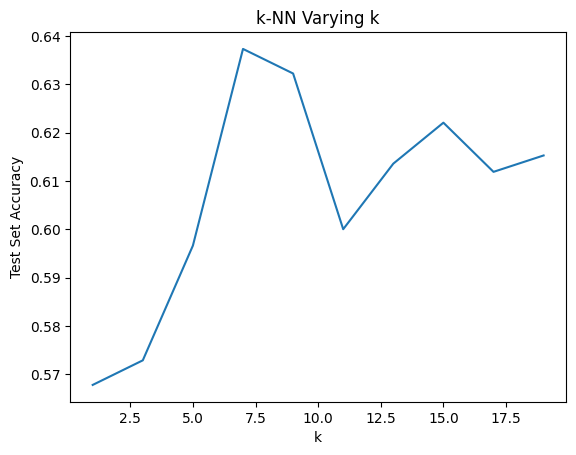

In [22]:
import gzip
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(gzip.compress(x.encode()))
    x2_compressed = len(gzip.compress(x2.encode()))
    xx2 = len(gzip.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### Brotli

    k  Test Set Accuracy
0   1           0.687500
1   3           0.729167
2   5           0.770833
3   7           0.791667
4   9           0.812500
5  11           0.833333
6  13           0.833333
7  15           0.833333
8  17           0.791667
9  19           0.770833
Best k value: 11
Accuracy on test set with best k: 0.8333333333333334


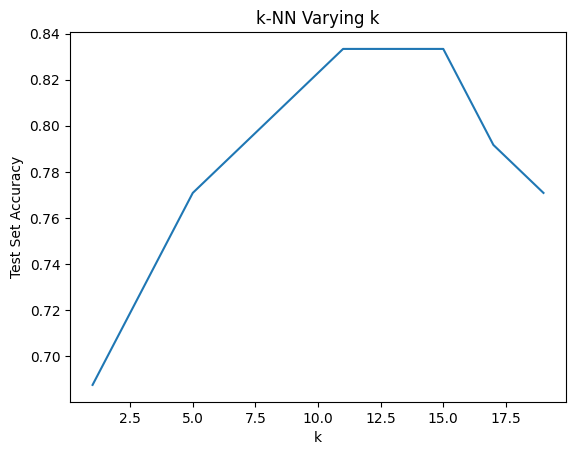

In [3]:
import brotli
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(brotli.compress(x.encode()))
    x2_compressed = len(brotli.compress(x2.encode()))
    xx2 = len(brotli.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### lz4

    k  Test Set Accuracy
0   1           0.708333
1   3           0.833333
2   5           0.854167
3   7           0.791667
4   9           0.791667
5  11           0.770833
6  13           0.770833
7  15           0.770833
8  17           0.770833
9  19           0.729167
Best k value: 5
Accuracy on test set with best k: 0.8541666666666666


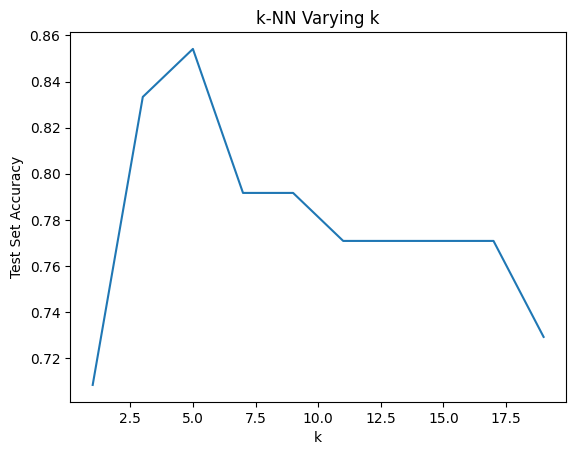

In [5]:
import lz4.frame
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(lz4.frame.compress(x.encode()))
    x2_compressed = len(lz4.frame.compress(x2.encode()))
    xx2 = len(lz4.frame.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Supondo que x_train, y_train, x_test e y_test já estejam definidos
# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### LZMA

    k  Test Set Accuracy
0   1           0.729167
1   3           0.750000
2   5           0.729167
3   7           0.708333
4   9           0.729167
5  11           0.750000
6  13           0.729167
7  15           0.729167
8  17           0.687500
9  19           0.645833
Best k value: 3
Accuracy on test set with best k: 0.75


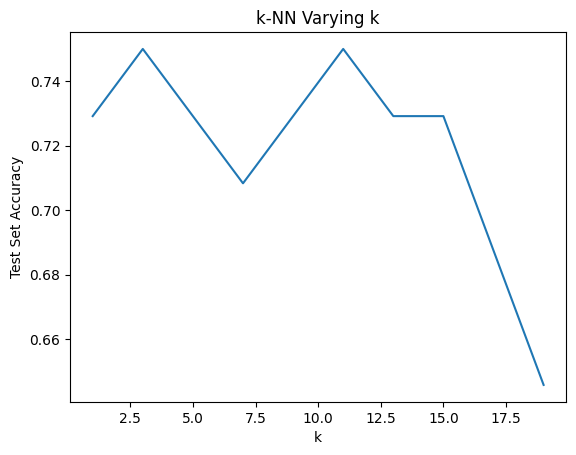

In [6]:
import lzma
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(lzma.compress(x.encode()))
    x2_compressed = len(lzma.compress(x2.encode()))
    xx2 = len(lzma.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Supondo que x_train e x_test são listas de strings, e y_train e y_test são suas respectivas labels

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### bz2

    k  Test Set Accuracy
0   1           0.812500
1   3           0.854167
2   5           0.833333
3   7           0.770833
4   9           0.812500
5  11           0.791667
6  13           0.812500
7  15           0.729167
8  17           0.708333
9  19           0.708333
Best k value: 3
Accuracy on test set with best k: 0.8541666666666666


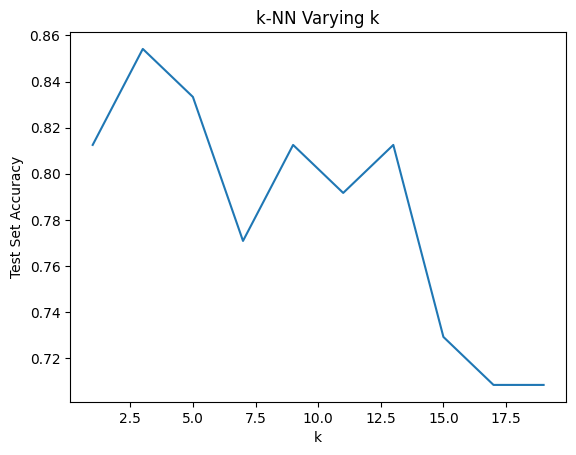

In [7]:
import bz2
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(bz2.compress(x.encode()))
    x2_compressed = len(bz2.compress(x2.encode()))
    xx2 = len(bz2.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Supondo que x_train e x_test são listas de strings, e y_train e y_test são suas respectivas labels

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

### pysmaz

    k  Test Set Accuracy
0   1           0.645833
1   3           0.479167
2   5           0.500000
3   7           0.500000
4   9           0.520833
5  11           0.604167
6  13           0.583333
7  15           0.604167
8  17           0.583333
9  19           0.520833
Best k value: 1
Accuracy on test set with best k: 0.6458333333333334


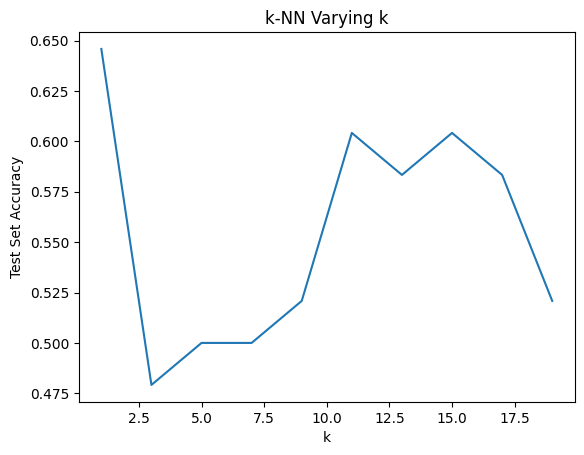

In [8]:
import pysmaz
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

def ncd(x, x2):
    x_compressed = len(pysmaz.compress(x.encode()))
    x2_compressed = len(pysmaz.compress(x2.encode()))
    xx2 = len(pysmaz.compress((" ".join([x, x2])).encode()))
    return (xx2 - min(x_compressed, x2_compressed)) / max(x_compressed, x2_compressed)

# Supondo que x_train e x_test são listas de strings, e y_train e y_test são suas respectivas labels

# Compute the NCD for the training data
train_ncd = [[ncd(x_train[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_train))]

# Compute the NCD for the test data using the training data
test_ncd = [[ncd(x_test[i], x_train[j]) for j in range(len(x_train))] for i in range(len(x_test))]

# Define the range of k values to test
k_values = list(range(1, 20, 2))  # Odd values from 1 to 19

# Store test set accuracies for each k
test_accuracies = []

# Evaluate each k directly on the test set
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(train_ncd, y_train)
    accuracy = knn.score(test_ncd, y_test)
    test_accuracies.append(accuracy)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'k': k_values,
    'Test Set Accuracy': test_accuracies
})

# Display the table
print(results_df)

# Find the best k
best_k = k_values[np.argmax(test_accuracies)]
print(f"Best k value: {best_k}")

# Train the KNN classifier with the best k
neigh = KNeighborsClassifier(n_neighbors=best_k)
neigh.fit(train_ncd, y_train)

# Evaluate the classifier with the best k
accuracy = neigh.score(test_ncd, y_test)
print("Accuracy on test set with best k:", accuracy)

# Optionally, plot the test set accuracies for different k values
plt.plot(k_values, test_accuracies)
plt.xlabel('k')
plt.ylabel('Test Set Accuracy')
plt.title('k-NN Varying k')
plt.show()

# Análises Adicionais (trabalhando)

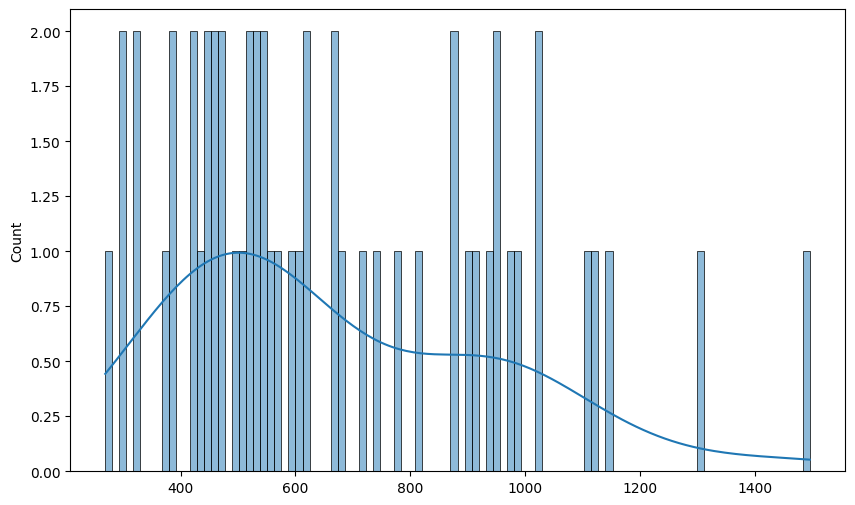

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule o comprimento de cada valor em x_neg
x_neg_len = [len(x) for x in x_neg]

# Crie a figura
plt.figure(figsize=(10, 6))

# Plote o histograma
sns.histplot(x_neg_len, bins=100, kde=True)

# Mostre o gráfico
plt.show()

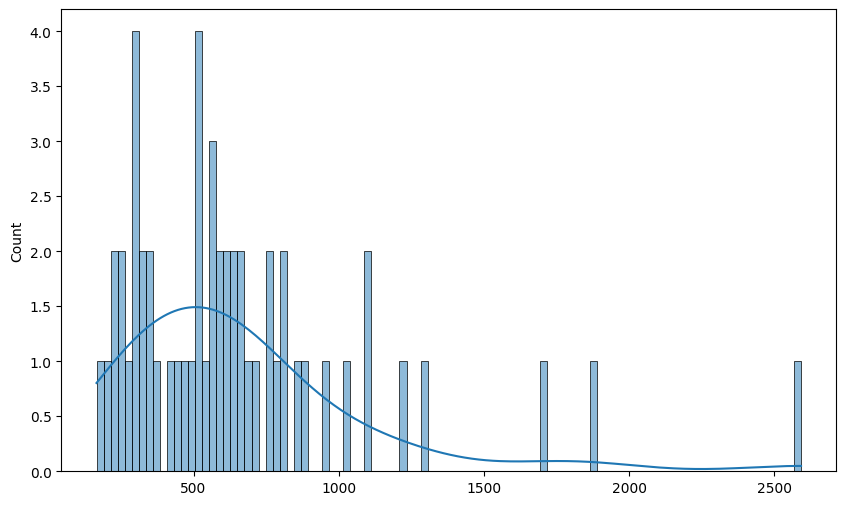

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcule o comprimento de cada valor em x_neg
x_pos_len = [len(x) for x in x_pos]

# Crie a figura
plt.figure(figsize=(10, 6))

# Plote o histograma
sns.histplot(x_pos_len, bins=100, kde=True)

# Defina os limites do eixo x
#plt.xlim(0, 10000)

# Mostre o gráfico
plt.show()

(108, 108)


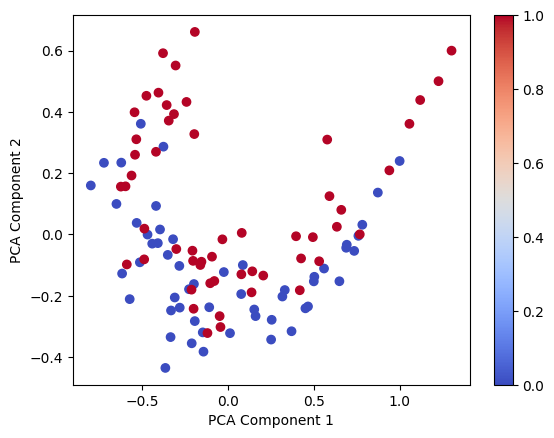

In [11]:
import numpy as np

train_ncd_arrays = np.array(train_ncd)
print(train_ncd_arrays.shape)

%matplotlib inline

# clear matplotlib figure
plt.clf()

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_ncd_arrays)

plt.scatter(train_pca[:,0], train_pca[:,1], c=y_train, cmap='coolwarm')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()